In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

# Preview
print("Training data:")
display(train.head())

print("Variable Definitions:")
display(variables.head()) 

Training data:


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Variable Definitions:


,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


In [5]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print("Missing values:")
print(train.isnull().sum()) 

Train shape: (23524, 13)
Test shape: (10086, 12)
Missing values:
country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


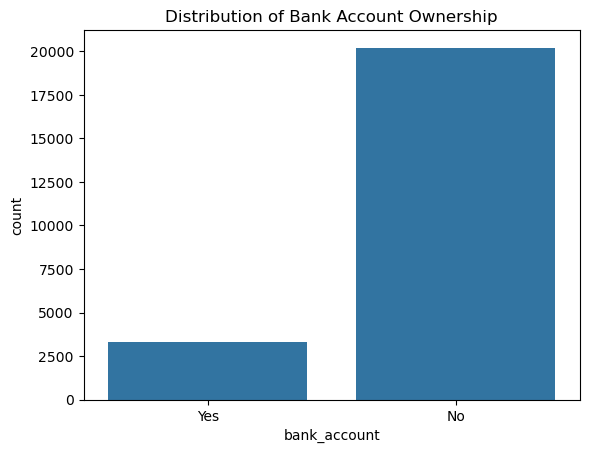

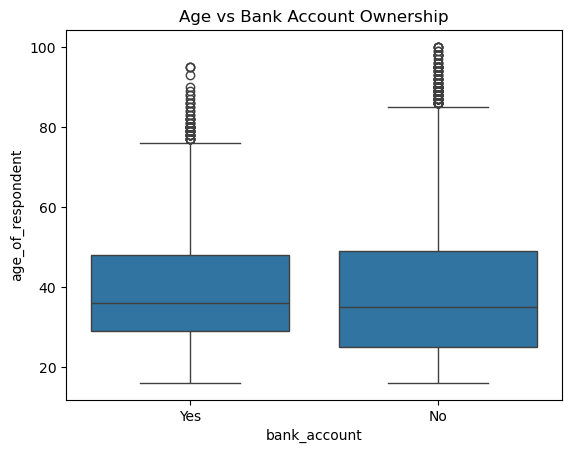

In [7]:
sns.countplot(data=train, x='bank_account')
plt.title("Distribution of Bank Account Ownership")
plt.show()

# Check other variable relationships
sns.boxplot(data=train, x='bank_account', y='age_of_respondent')
plt.title("Age vs Bank Account Ownership")
plt.show() 

In [9]:
X = train.drop(['bank_account', 'uniqueid'], axis=1)
y = train['bank_account'].map({'Yes': 1, 'No': 0})

# Combine train and test for consistent encoding
combined = pd.concat([X, test.drop(['uniqueid'], axis=1)], axis=0)

# One-hot encoding
combined_encoded = pd.get_dummies(combined)

# Split back
X_encoded = combined_encoded.iloc[:len(X)]
test_encoded = combined_encoded.iloc[len(X):] 

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}") 

  File "C:\Users\HP\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\HP\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2670, number of negative: 16149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 18819, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.141878 -> initscore=-1.799780
[LightGBM] [Info] Start training from score -1.799780
Validation Accuracy: 0.8901


In [13]:
X_encoded.columns = X_encoded.columns.str.replace(' ', '_') 

In [25]:
predictions = model.predict(test_encoded)
ss['bank_account'] = np.where(predictions == 1, 'Yes', 'No')

ss.to_csv('submission.csv', index=False) 
print("✅ Submission file 'submission.csv' has been created successfully!") 

✅ Submission file 'submission.csv' has been created successfully!
